## Lesson 06
### Gradient Boosting

In [1]:
from sklearn import model_selection
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

import numpy as np

import matplotlib.pyplot as plt

#### Sample Data

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

#### GB

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    # The GB algorithm will be initialized with zero values
    # Then trees will be added from `trees_list`, increment step is `eta`
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
# MSE

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Loss function: $L(y, z) = (y-z)^{2}$  
Derivative of loss function: $L'(y, z) = 2(z-y)$

In [6]:
def bias(y, z):
    return (y - z) # coefficient `2` is dropped

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    trees = []
    
    # add train and test errors to the lists on each iteration
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # initialize boosting with a start algorithm returning zero
        # fit the first algorithm and add to the list
        if len(trees) == 0:
            # fit the first tree on train data
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # get prediction on current composition
            target = gb_predict(X_train, trees, coefs, eta)
            
            # starting with second algorithm, fit on bias data
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    print(f'Algorithm using {n_trees} trees with depth {max_depth} with step {eta} on train data, error: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)
    print(f'Algorithm using {n_trees} trees with depth {max_depth} with step {eta} on test data, error: {mean_squared_error(y_test, test_prediction)}')

#### Apply Models

In [9]:
def get_error_by_n_trees_plot(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
def analyze_gb_by_n_trees(n_trees):
    n_trees = n_trees  # number of trees in ensemble
    max_depth = 2  # max depth of the tree
    coefs = [1] * n_trees  # coefficients
    eta = 0.2  # increment step
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth)
    
    get_error_by_n_trees_plot(n_trees, train_errors, test_errors)

Algorithm using 20 trees with depth 2 with step 0.2 on train data, error: 2098.024793413613
Algorithm using 20 trees with depth 2 with step 0.2 on test data, error: 3085.551043923037


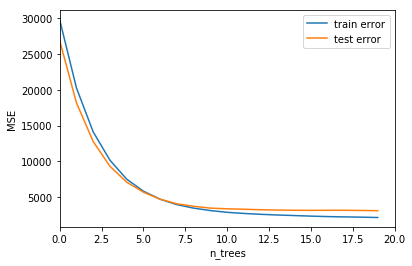

In [11]:
analyze_gb_by_n_trees(20)

Algorithm using 50 trees with depth 2 with step 0.2 on train data, error: 1536.5687247992016
Algorithm using 50 trees with depth 2 with step 0.2 on test data, error: 3219.9046197105476


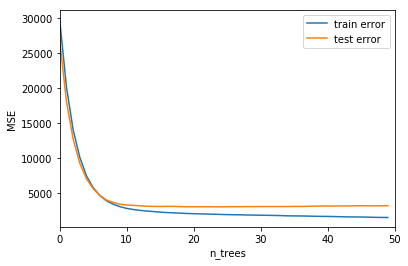

In [12]:
analyze_gb_by_n_trees(50)

Increasing number of trees does not make significant change in MSE.

In [13]:
def get_error_by_depth_plot(max_depth, train_err, test_err):
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth)
    plt.plot(list(range(max_depth)), train_err, label='train error')
    plt.plot(list(range(max_depth)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [14]:
def analyze_gb_by_depth(max_depth):
    n_trees = 20  # number of trees in ensemble
    max_depth = max_depth  # max depth of the tree
    coefs = [1] * n_trees  # coefficients
    eta = 0.2  # increment step
    
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth)
    
    get_error_by_depth_plot(n_trees, train_errors, test_errors)

Algorithm using 20 trees with depth 10 with step 0.2 on train data, error: 4.711752909907999
Algorithm using 20 trees with depth 10 with step 0.2 on test data, error: 4550.234710581321


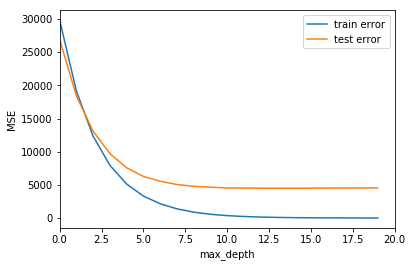

In [15]:
analyze_gb_by_depth(10)

Algorithm using 20 trees with depth 50 with step 0.2 on train data, error: 3.9620387217841118
Algorithm using 20 trees with depth 50 with step 0.2 on test data, error: 6806.940361218066


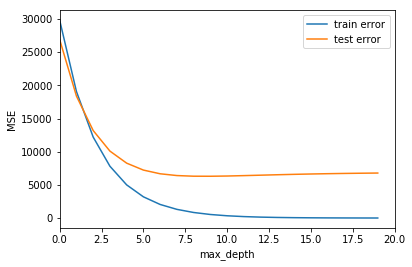

In [16]:
analyze_gb_by_depth(50)

Increasing tree depth results in model overfitting.